# Morphological transformations

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# For use in Google Colab
%cd /content/drive/MyDrive/machine_vision/scripts/1_image_processing

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/machine_vision/scripts/1_image_processing'
C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\1_image_processing


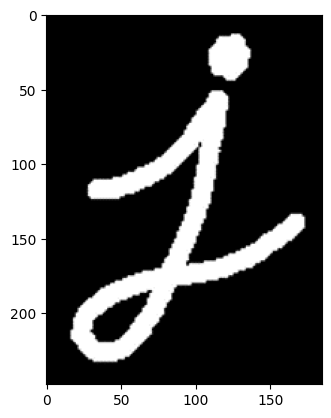

In [3]:
# Load image
image = cv2.imread("../../data/letter_j.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
plt.show()

## Dilation

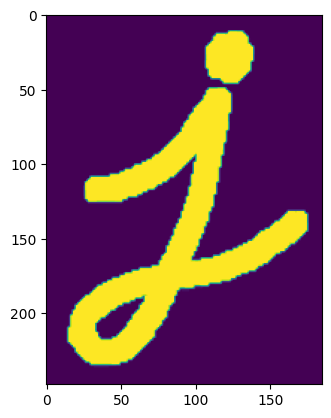

In [4]:
# Dilation
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(image, kernel, iterations = 1)
plt.imshow(dilation)
plt.show()

## Erosion

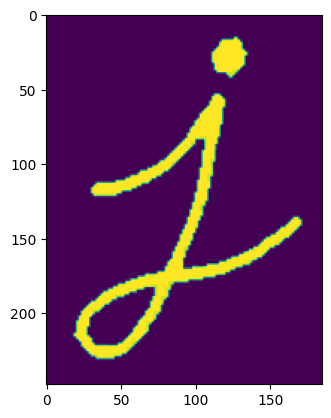

In [5]:
# Erosion
kernel = np.ones((5,5), np.uint8)
erode = cv2.erode(image, kernel, iterations = 1)
plt.imshow(erode)
plt.show()

## Opening

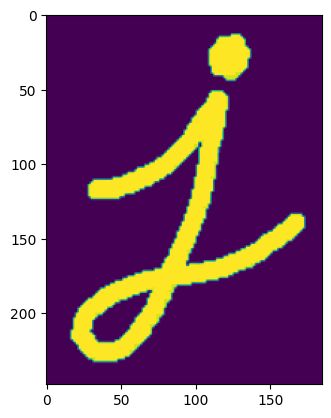

In [6]:
# Opening
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)
plt.show()

## Closing

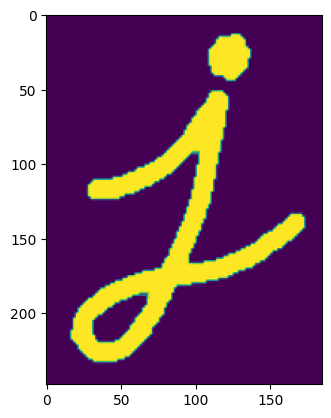

In [7]:
# Closing
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.show()

## Skeletonization

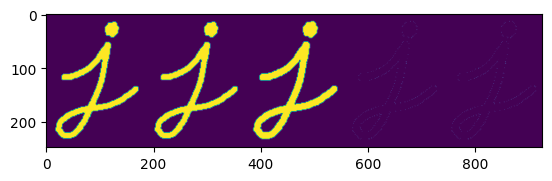

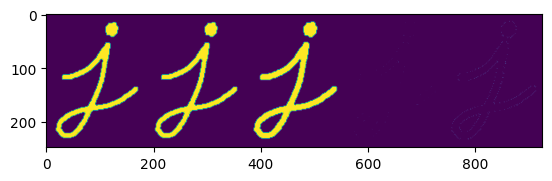

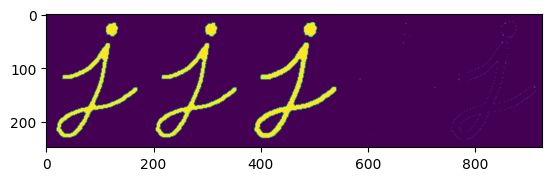

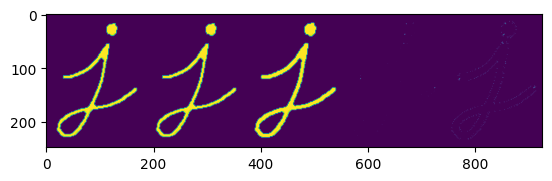

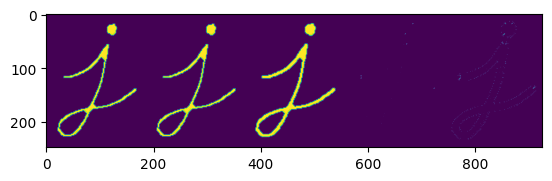

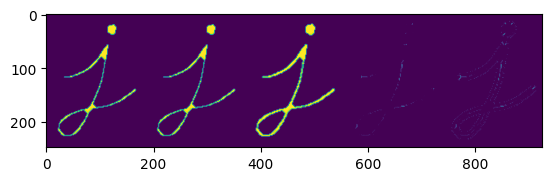

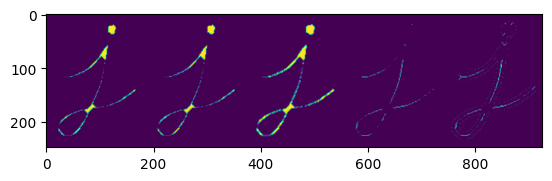

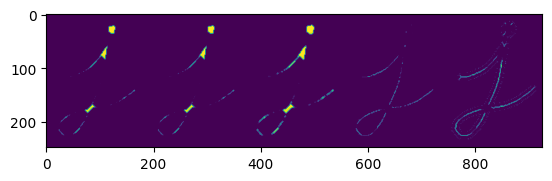

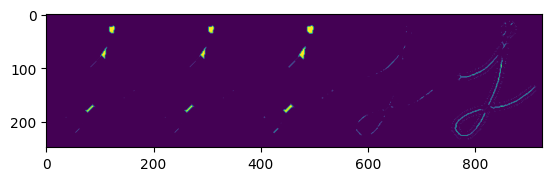

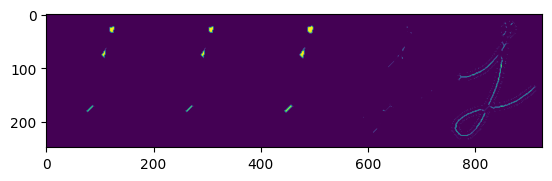

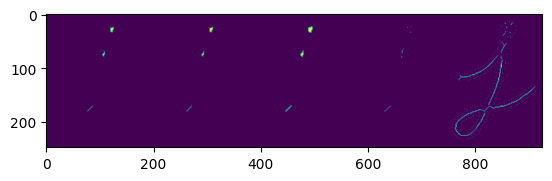

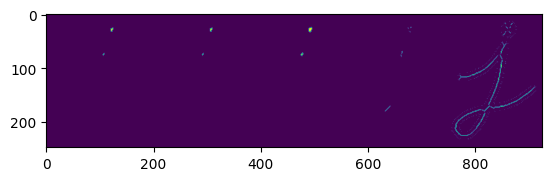

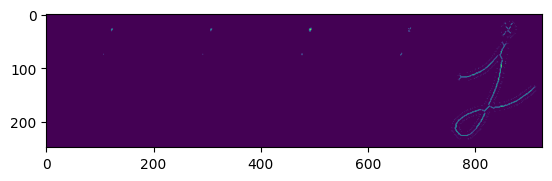

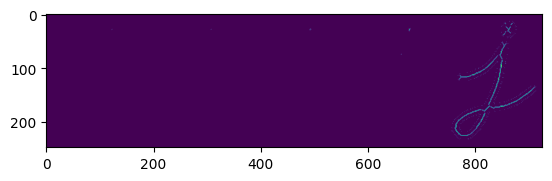

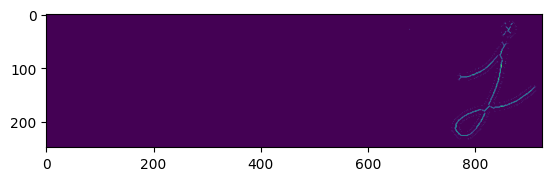

In [8]:
# Make empty skeleton image
size = np.size(image)
skel = np.zeros(image.shape, np.uint8)

# Skeletonize
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
done = False
while not done:
        
    # Eroding
    eroded = cv2.erode(image, element)
    
    # Dilating
    dilated = cv2.dilate(eroded, element)
        
    # Subtraction
    temp = cv2.subtract(image, dilated)
        
    # OR-operation
    skel = cv2.bitwise_or(skel, temp)

    # Copy eroded image
    image = eroded.copy()
        
    # If eroded image is empty => stop
    zeros = size - cv2.countNonZero(image)
    if zeros == size:
        done = True

    # Show result
    result = np.concatenate((image, eroded, dilated, temp, skel), axis=1)
    plt.imshow(result)
    plt.pause(0.001)